In [1]:
import selenium
print(selenium.__version__)

4.15.2


### Data collection - download all of the publishers links from the comicsdb.cz and export them to a .csv file

In [3]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


DRIVER_PATH = "C:\\Users\\petr.musil\\Desktop\\python\\edgedriver\\msedgedriver.exe"
service = Service(executable_path = DRIVER_PATH)
driver = webdriver.Edge(service=service)

try:
    publisher = "https://www.comicsdb.cz/prehled-nakladatelstvi/1/"
    list_of_links = []
    for num in list(range(1,8)):
        driver.get(f'{publisher}{num}')    
        time.sleep(1)
        # wait for the element
        element = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".card.text-center.p-2")))
        links = driver.find_element(by = By.CSS_SELECTOR, value = ".table-border-dashed").find_elements(by = By.TAG_NAME, value = "a")
        for link in links:
            list_of_links.append([link.get_attribute("href")])
finally:
    driver.quit()

filename = "./data/links_publishers.csv"
with open(filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(list_of_links)

### Visit each webpage of a publisher from the source .csv file and get name, number of titles and link. Save the result to a .csv file

In [29]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

DRIVER_PATH = "C:\\Users\\petr.musil\\Desktop\\python\\edgedriver\\msedgedriver.exe"
service = Service(executable_path = DRIVER_PATH)
driver = webdriver.Edge(service=service)

try:
    list_of_publisher_data = []
    with open("./data/links_publishers.csv", "r") as file:
        reader = csv.reader(file)
        for row in reader:
            driver.get(row[0])
            time.sleep(1)
            publisher = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, ".font-weight-semibold")))
            number_of_titles = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, ".font-weight-bold.text-cdbred.ml-1")))
            list_of_publisher_data.append([publisher.text.strip(), number_of_titles.text.strip(), row[0].strip()])
finally:
    driver.quit()

filename = "./data/output_publishers_data.csv"
with open(filename, "w", newline="", encoding="utf-8") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=";")
    csvwriter.writerow(["name", "number_of_titles", "link"])
    csvwriter.writerows(list_of_publisher_data)

### Visit all titles overviews and save links to all the titles to a .csv file

In [39]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


DRIVER_PATH = "C:\\Users\\petr.musil\\Desktop\\python\\edgedriver\\msedgedriver.exe"
service = Service(executable_path = DRIVER_PATH)
driver = webdriver.Edge(service=service)

try:
    overview = "https://www.comicsdb.cz/prehled-comicsu/6/"
    list_of_links = []
    for num in list(range(1,106)):
        driver.get(f'{overview}{num}')    
        time.sleep(2)
        # wait for the element
        table_ = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".table.table-hover.table-xs")))
        links = driver.find_elements(by = By.CSS_SELECTOR, value = ".table-border-dashed a")
        #links = links.find_elements(by = By.TAG_NAME, value = "a")
        for link in links:
            list_of_links.append([link.get_attribute("href")])
finally:
    driver.quit()

filename = "./data/links_titles.csv"
with open(filename, "w", newline="", encoding="utf-8") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(list_of_links)

### Visit all the titles details and get all the data

In [15]:
import csv
import re
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

DRIVER_PATH = "C:\\Users\\petr.musil\\Desktop\\python\\edgedriver\\msedgedriver.exe"
service = Service(executable_path = DRIVER_PATH)
driver = webdriver.Edge(service=service)

try:
    list_of_titles_data = []
    with open("./data/links_titles_1.csv", "r") as file:
        reader = csv.reader(file)
        for row in reader:
            driver.get(row[0])
            time.sleep(1)
            title = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, ".font-weight-semibold")))
            soup = BeautifulSoup(driver.page_source, "html.parser")
            title = soup.find("span", "font-weight-semibold").text
            basic_info = soup.find("small")
            try:
                link_publisher = basic_info.find("a").get("href")
            except:
                link_publisher = "NA"
            try:
                year_pattern = re.compile(r'\d{4}')
                year = year_pattern.search(basic_info.text)
                year = year.group()
            except:            
                year = "NA"
            pages = "NA"
            price = "NA"
            dt_tags = soup.find_all("dt")
            for tag in dt_tags:
                if "Stran" in tag.text:
                    pages = tag.next_sibling.text
                elif "Cena" in tag.text:
                    price = tag.next_sibling.text
            list_of_titles_data.append([title.strip(), year.strip(), row[0].strip(), link_publisher.strip(), pages.strip(), price.strip()])
finally:
    driver.quit()

filename = "./data/output_titles_data.csv"
with open(filename, "w", newline="", encoding="utf-8") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=";")
    csvwriter.writerow(["title", "year", "link_title","link_publisher", "pages", "price"])
    csvwriter.writerows(list_of_titles_data)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              618 non-null    object
 1   number_of_titles  618 non-null    int64 
 2   link              618 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.6+ KB


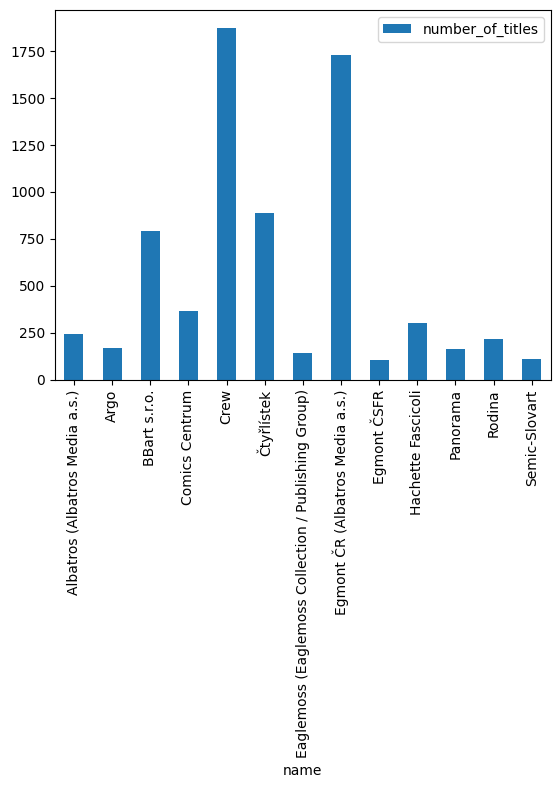

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

publishers = pd.read_csv("./data/output_publishers_data.csv", delimiter=";")
publishers.info()
publishers = publishers[publishers["number_of_titles"] > 100]
publishers.plot(kind = "bar", x = "name", y = "number_of_titles")
plt.show()

In [48]:
titles = pd.read_csv("./data/output_titles_data.csv", delimiter=";")
titles.info()
titles = titles[titles["link_publisher"] == "/nakladatelstvi/1/crew"]
titles.info()
titles["year"] = titles["year"].astype(int)
titles["pages"] = titles["pages"].fillna(0).astype(int)
titles["price"] = titles["price"].str.replace(" Kč", "").astype(int)
titles.info()
#print(titles)
titles.describe()
print(titles[titles["pages"] == 1338])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3000 non-null   object 
 1   year            2993 non-null   float64
 2   link_title      3000 non-null   object 
 3   link_publisher  2963 non-null   object 
 4   pages           2988 non-null   float64
 5   price           2849 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 2989
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           888 non-null    object 
 1   year            888 non-null    float64
 2   link_title      888 non-null    object 
 3   link_publisher  888 non-null    object 
 4   pages           886 non-null    float64
 5   price           888 non-null    object 
dtypes: float64